In [140]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


image_a = cv2.imread('./input1.jpg')
image_b = cv2.imread('./input2.png')

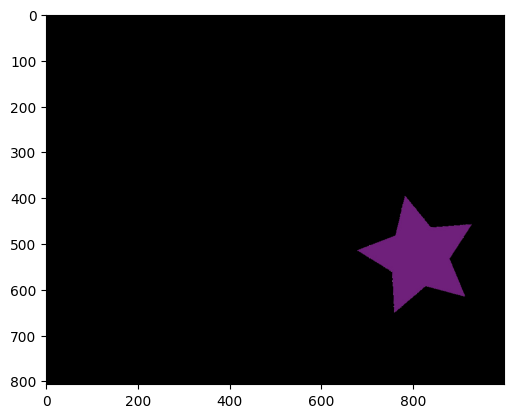

In [141]:
# 1a

image_1a = image_a.copy()
color_bg = np.array([127, 179, 216])
diff = cv2.absdiff(image_1a, color_bg)
mask = cv2.inRange(diff, np.array([0, 0, 0]), np.array([70, 80, 100]))
black_bg = np.zeros_like(image_1a)
image_1a[mask == 255] = [0, 0, 0]


color_dict_HSV = {
    "yellow": [[35, 255, 255], [25, 50, 70]],
    "orange": [[24, 255, 255], [10, 50, 70]],
    "red": [[180, 255, 255], [159, 50, 70]],
    "blue": [[128, 255, 255], [90, 50, 70]],
    "green": [[89, 255, 255], [36, 50, 70]],
    "purple": [[158, 255, 255], [129, 50, 70]],
}
image_hsv = cv2.cvtColor(image_1a, cv2.COLOR_BGR2HSV)

image_outputs = []

for color, (upper, lower) in color_dict_HSV.items():
    mask = cv2.inRange(image_hsv, np.array(lower), np.array(upper))
    image_output = cv2.bitwise_and(image_a, image_a, mask=mask)
    
    
    plt.imshow(cv2.cvtColor(image_output, cv2.COLOR_BGR2RGB))
    cv2.imwrite(f'./output_1a_{color}.jpg', image_output)

In [142]:
# 1b
image_gray_1b = cv2.cvtColor(image_1a, cv2.COLOR_BGR2GRAY)
image_binary = cv2.threshold(image_gray_1b, 0, 255, cv2.THRESH_BINARY_INV)[1]
kernel = np.ones((4,6),np.uint8)
image_output_1b = cv2.morphologyEx(image_binary, cv2.MORPH_OPEN, kernel)
cv2.imwrite(f'./output_1b.png', image_output_1b)


# image_gray_1b = cv2.cvtColor(image_a, cv2.COLOR_BGR2GRAY)

# image_yellow = cv2.threshold(image_gray_1b, 200, 255, cv2.THRESH_BINARY_INV)[1]
# image_other_colors = cv2.threshold(image_gray_1b, 135, 255, cv2.THRESH_BINARY)[1]
# kernel = np.ones((10, 10),np.uint8)
# cleaned_image = cv2.morphologyEx(image_other_colors, cv2.MORPH_OPEN, kernel)

# image_gray = cv2.bitwise_xor(image_yellow, cleaned_image)


# images = ['image_gray_1b', 'image_yellow', 'image_other_colors', 'cleaned_image', 'image_gray']

# for i in images:
#     plt.imshow(image_output_1b, cmap='gray')
# plt.axis('off')
# plt.show()


True